# Hatch UFO Sightings Dataset

Over 18,000 UFO sightings from 593 BCE to 2003. The dataset was hand-curated by [Larry Hatch](https://openminds.tv/larry-hatch-ufo-database-creator-remembered/) and originally distributed with his MS-DOS program, `*U*`. Adam Kehoe wrote a [post](https://web.archive.org/web/20221201122153/https://blog.adamkehoe.com/hatch-udatabase/) about it and Rich Geldreich wrote a [post](https://medium.com/@richgel99/hatchs-ufo-database-event-descriptions-converted-to-readable-english-and-imported-into-my-ufo-8b4cafb884f6) about his [ufo_data](https://github.com/richgel999/ufo_data) project, which includes an algorithm for decoding Larry's abbreviated descriptions.

The CSV I'm using is from [rr0/udb](https://github.com/RR0/uDb).

Ideas:
- line plot of sightings over time
- correlation matrix and pair plot of the numeric features
- violin plot of credibility or strangeness across continents
- count plot of UFO types (`typeOfUfoCraftFlags`)
- geospatial plotting with GeoPandas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# hatch = pd.read_csv("hatch.csv")
hatch = pd.read_csv("https://lab.aef.me/files/data/hatch.csv")

# remove year, month, day, and time tilde prefixes
hatch["year"] = hatch["year"].str.replace("~", "")
hatch["month"] = hatch["month"].str.replace("~", "")
hatch["day"] = hatch["day"].str.replace("~", "")
hatch["time"] = hatch["time"].str.replace("~", "")

# convert to float so we can use NaN for missing; leave time as string
hatch["year"] = pd.to_numeric(hatch["year"], errors="coerce")
hatch["month"] = pd.to_numeric(hatch["month"], errors="coerce")
hatch["day"] = pd.to_numeric(hatch["day"], errors="coerce")

# convert 0 days to NaN
hatch.loc[hatch["day"] == 0, "day"] = pd.NA
hatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18123 entries, 0 to 18122
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18123 non-null  int64  
 1   year                                 18120 non-null  float64
 2   month                                18069 non-null  float64
 3   day                                  16841 non-null  float64
 4   time                                 14760 non-null  object 
 5   location                             18123 non-null  object 
 6   stateOrProvince                      18108 non-null  object 
 7   title                                18121 non-null  object 
 8   description                          18099 non-null  object 
 9   locale                               18123 non-null  object 
 10  duration                             18123 non-null  int64  
 11  credibility                 

In [3]:
hatch.head()

,id,year,month,day,time,location,stateOrProvince,title,description,locale,...,evidenceAndSpecialEffectsFlags,miscellaneousDetailsFlags,latitude,elevation,relativeAltitude,ref,strangeness,miscellaneousFlags,continent,country
0,1,-593.0,NaN,NaN,NaN,CHALDEA,Chaldea,EZEKIEL,FIERY SPHERE LANDS/4 SUPPORTS\nTAKEN FOR A RID...,Pasture,...,Historical,NaN,31.00,200.0,0.0,"VALLEE,Jacques: UFOS IN SPACE- Anatomy of a Ph...",8,Oddity,Middle East,Iraq
1,2,-322.0,NaN,NaN,NaN,"TYRE =SUR,LEBANON",Tyre,SIEGE/ALEXANDER the GREAT,FLYING SHIELD BEAMS \nWALLS CRUMBLE,Town & city,...,"Traces, Historical",NaN,33.27,20.0,100.0,"MUFON UFO JOURNAL, Seguin,TX USA. Monthly., ...",9,NaN,Middle East,Lebanon
2,3,-213.0,NaN,NaN,NaN,"HADRIA,ROMAN EMP",Firenze,'ALTAR' IN SKY,MAN IN WHITE\n12 SUCH BETWEEN 222 AND 90 B.C.,Pasture,...,Historical,NaN,43.98,NaN,NaN,"VALLEE,Jacques: UFOS IN SPACE- Anatomy of a Ph...",8,"Oddity, Wave",Western Europe,Italy
3,4,-170.0,NaN,NaN,NaN,"LANUPIUM = ALBANO LAZIALE,ITL",RM,SPECTACULAR FLEET OF SHIPS IN AIR,NFD,Pasture,...,Historical,NaN,41.73,384.0,NaN,"HAINES,Richard Ph.D: PROJECT DELTA; 1994, LD...",6,"Oddity, Wave",Western Europe,Italy
4,5,70.0,5.0,21.0,18:00,PALESTINE,UNK,MANY OBS,CHARIOTS+REGIMENTS CIRCLE TOWNS in SKY\nLOUD N...,Pasture,...,"Technical, Historical",Sound,31.77,NaN,NaN,"HAINES,Richard Ph.D: PROJECT DELTA; 1994, LD...",7,Wave,Middle East,Israel


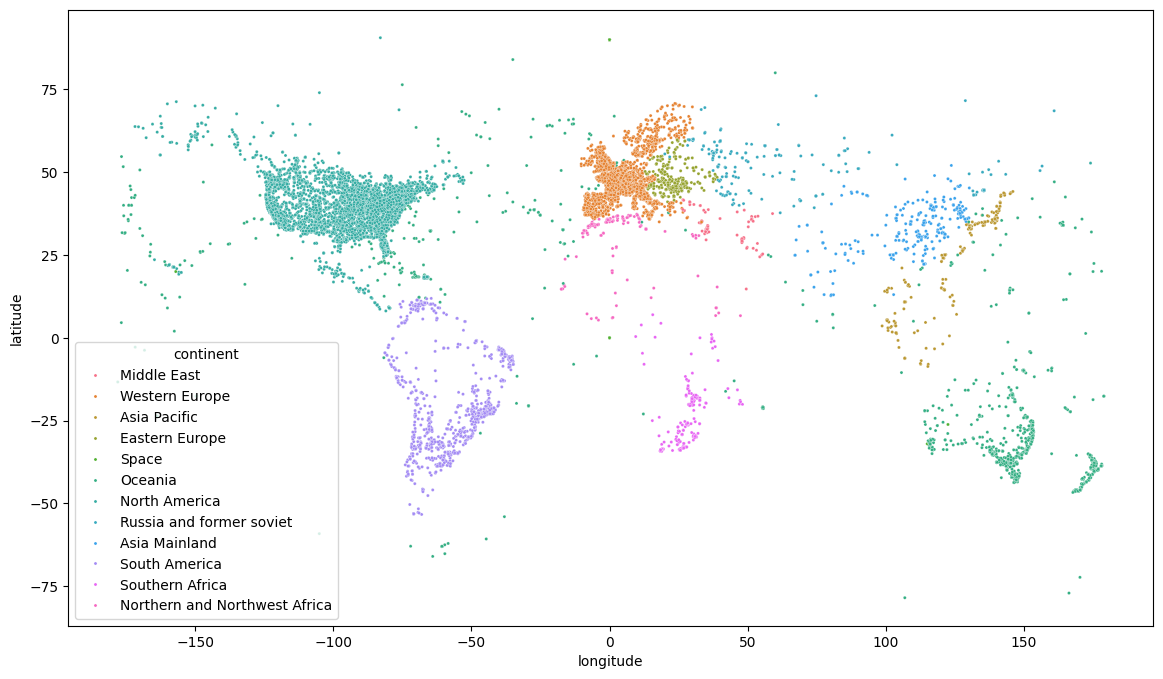

In [4]:
# sightings form outlines of continents
_, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(hatch, x="longitude", y="latitude", hue="continent", s=5, ax=ax)
plt.show()